In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [236]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\Airplane price dataset.csv")

In [232]:
df2 = df.copy()
le = LabelEncoder()
poly = PolynomialFeatures(degree = 4)
dtr = DecisionTreeRegressor()
ls = Lasso()
rd = Ridge()
scaler = StandardScaler()
model = LinearRegression()
model2 = LinearRegression()

In [216]:
df2 = df2.drop(columns = ['Üretim Yılı','Motor Türü','Satış Bölgesi','Model'])
df2

,Motor Sayısı,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Fiyat ($)
0,2,50,3000,14.36,2185.43,36,1.285708e+07
1,2,50,3000,4.03,1202.08,26,1.391406e+07
2,2,180,6300,13.26,761.38,35,9.073570e+07
3,2,162,5700,14.61,592.63,0,1.366597e+08
4,1,4,1285,18.49,4245.99,38,2.037981e+05
...,...,...,...,...,...,...,...
12372,2,396,15600,12.16,3054.29,29,3.898071e+08
12373,2,50,3000,8.26,3107.67,18,1.593888e+07
12374,2,162,5700,6.93,3972.16,8,9.870994e+07
12375,1,4,1285,14.28,999.84,10,3.965207e+05


In [217]:
df2.isnull().sum()

Motor Sayısı                  0
Kapasite                      0
Menzil (km)                   0
Yakıt Tüketimi (L/saat)       0
Saatlik Bakım Maliyeti ($)    0
Yaş                           0
Fiyat ($)                     0
dtype: int64

In [218]:
cols = ['Motor Sayısı', 'Kapasite',
       'Menzil (km)', 'Yakıt Tüketimi (L/saat)', 'Saatlik Bakım Maliyeti ($)',
       'Yaş', 'Fiyat ($)']
df2.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [219]:
dfobj = df2.select_dtypes(include = 'object')
for i in dfobj.columns:
    df2[i] = le.fit_transform(df2[i])

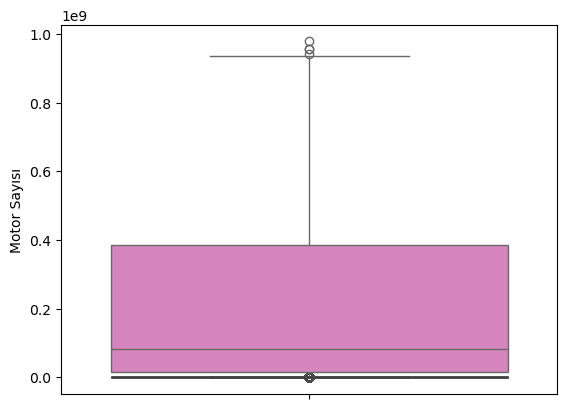

In [220]:
for i in cols:
    sns.boxplot(df2[i])

In [221]:
def Outliers(df,columns):
    for i in columns:
        df[i] = df[i].astype('float')
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        df.loc[df[i]>upperlimit,i] = upperlimit
        df.loc[df[i]<lowerlimit,i] = lowerlimit
    return df
cols = ['Motor Sayısı', 'Kapasite',
       'Menzil (km)', 'Yakıt Tüketimi (L/saat)', 'Saatlik Bakım Maliyeti ($)',
       'Yaş', 'Fiyat ($)']
df2 = Outliers(df2,cols)

In [222]:
df2

,Motor Sayısı,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Fiyat ($)
0,2.0,50.0,3000.0,14.36,2185.43,36.0,1.285708e+07
1,2.0,50.0,3000.0,4.03,1202.08,26.0,1.391406e+07
2,2.0,180.0,6300.0,13.26,761.38,35.0,9.073570e+07
3,2.0,162.0,5700.0,14.61,592.63,0.0,1.366597e+08
4,2.0,4.0,1285.0,18.49,4245.99,38.0,2.037981e+05
...,...,...,...,...,...,...,...
12372,2.0,396.0,15600.0,12.16,3054.29,29.0,3.898071e+08
12373,2.0,50.0,3000.0,8.26,3107.67,18.0,1.593888e+07
12374,2.0,162.0,5700.0,6.93,3972.16,8.0,9.870994e+07
12375,2.0,4.0,1285.0,14.28,999.84,10.0,3.965207e+05


<Axes: >

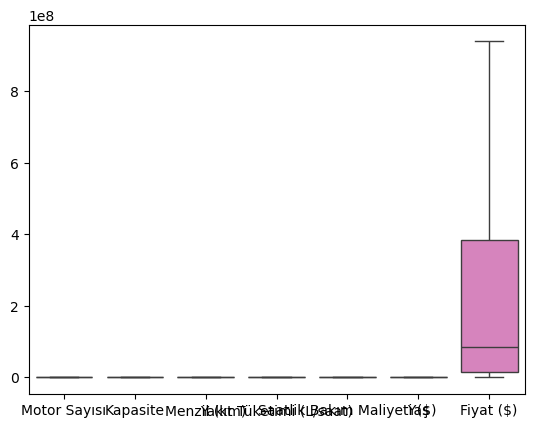

In [223]:
sns.boxplot(df2)

In [224]:
x = df2.drop(columns = 'Fiyat ($)')
y = df2['Fiyat ($)']

In [225]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70,test_size = 0.3)

In [226]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)
model.fit(xtrainscaled,ytrain)
linears = model.score(xtestscaled,ytest)

In [227]:
poly.fit(xtrain)
xtrainpoly = poly.transform(xtrain)
xtestpoly = poly.transform(xtest)
model2.fit(xtrainpoly,ytrain)
polys = model2.score(xtestpoly,ytest)

In [228]:
rd.fit(xtrainscaled,ytrain)
ridge = rd.score(xtestscaled,ytest)

In [229]:
ls.fit(xtrainscaled,ytrain)
lasso = ls.score(xtestscaled,ytest)

D:\Application Programs\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.975e+16, tolerance: 4.565e+16
  model = cd_fast.enet_coordinate_descent(


In [234]:
dtr.fit(xtrainscaled,ytrain)
dtrs = dtr.score(xtestscaled,ytest)

In [235]:
print("LinearRegression Score:",linears)
print("PolynomialFeatures Score:",polys)
print("Lasso Regression Score:",lasso)
print("Ridge Regression Score:",ridge)
print("DecisionTreeRegressor Score:",dtrs)

LinearRegression Score: 0.9093431838153844
PolynomialFeatures Score: 0.980950377507798
Lasso Regression Score: 0.909343183712475
Ridge Regression Score: 0.9093339442611384
DecisionTreeRegressor Score: 0.9634968346112378
